In [1]:
import geopandas as gpd
import rasterio
from rasterio import features
import matplotlib.pyplot as plt
import os
from rasterio.plot import show

In [2]:
# MTK-virtavesi
#*************
#1: virtavesialue (3D Polygon), kohdeluokat: 36313
#2: virtavesikapea (3D Line String), kohdeluokat: 36311, 36312
#MTK-vakavesi
#************
#1: jarvi (3D Polygon), kohdeluokat: 36200
#2: meri (3D Polygon), kohdeluokat: 36211
#MTK-tie
#*******
#1: tienroteksti (3D Point), kohdeluokat: 12106, 12181, 12182, 12183
#2: tiesymboli (3D Point), kohdeluokat: 12192, 12193, 12200
#3: tieviiva (3D Line String), kohdeluokat: 12111, 12112, 12121, 12122, 12131, 12132, 12141, 12151, 12152, 12311, 12312, 12313, 12314, 12316
#MTK-suo
#*******
#1: soistuma (3D Polygon), kohdeluokat:  35300
#2: suo (3D Polygon), kohdeluokat:  35411, 35412, 35421, 35422
#MTK-kallio
#**********
#1: kallioalue (3D Polygon), kohdeluokat: 34100

In [20]:
def maastolayer_to_raster(in_fn, out_fd, layer, ref_raster, save_in='asc', plot=True):
    '''
    processing maastotietokanta (gpkg) layer to raster
    '''
    if not os.path.exists(out_fd):
        os.makedirs(out_fd)
        
    if save_in == 'geotiff':
        out_fn = os.path.join(out_fd, f'{layer}') + '.tif'
    elif save_in == 'asc':
        out_fn = os.path.join(out_fd, f'{layer}') + '.asc'
    
    rst = rasterio.open(ref_raster)
    meta = rst.meta.copy()
    meta.update(compress='lzw')

    if save_in == 'geotiff':
        meta.update({"driver": "GTiff"})        
    elif save_in == 'asc':
        meta.update({"driver": "AAIGrid"})
    
    subset=list(rst.bounds[:])
    data = gpd.read_file(in_fn, layer=layer, include_fields=["kohdeluokka", "geometry"], bbox=subset)
    with rasterio.open(out_fn, 'w+', **meta) as out:
        out_arr = out.read(1)

        # this is where we create a generator of geom, value pairs to use in rasterizing
        shapes = ((geom,value) for geom, value in zip(data.geometry, data.kohdeluokka))

        burned = features.rasterize(shapes=shapes, fill=-9999, out=out_arr, transform=out.transform)
        burned[burned == 0] = -9999
        out.write_band(1, burned)
        
        if plot==True:
            raster = rasterio.open(out_fn)
            show(raster)

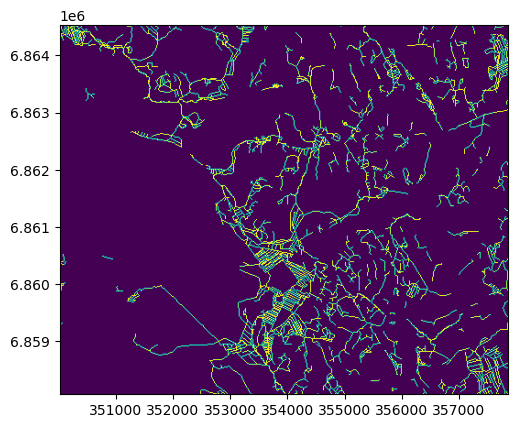

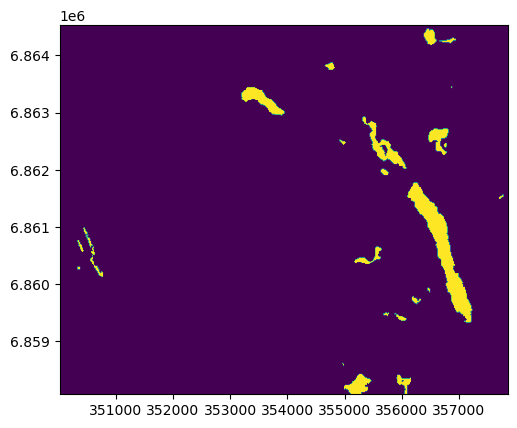

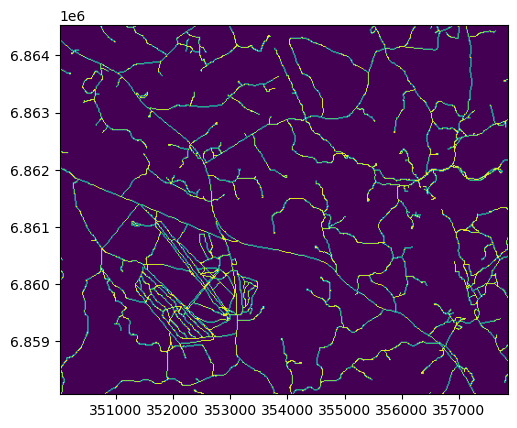

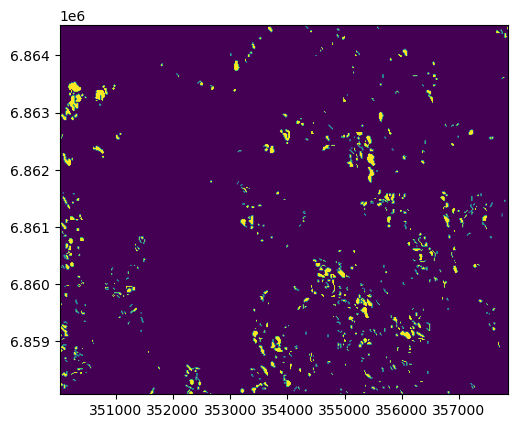

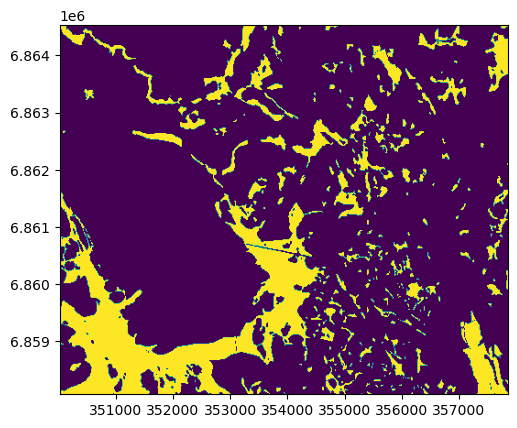

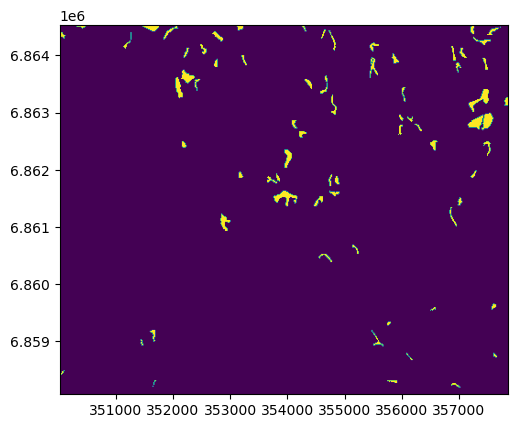

In [21]:
new_subset = [350016.0, 6858072.0, 357856.0, 6864536.0]
vive_fn = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-virtavesi_23-03-02.gpkg'
vave_fn = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-vakavesi_23-03-02.gpkg'
tie_fn = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-tie_23-03-02.gpkg'
suo_fn = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-suo_23-03-02.gpkg'
kallio_fn = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-kallio_23-03-02.gpkg'
ref_raster = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/dem/kuivajarvi/cmask_d8_kuivajarvi_fill.asc'
out_fd = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/maastotietokanta'
 
maastolayer_to_raster(in_fn=vive_fn, out_fd=out_fd, layer='virtavesikapea', ref_raster=ref_raster)
maastolayer_to_raster(in_fn=vave_fn, out_fd=out_fd, layer='jarvi', ref_raster=ref_raster)
maastolayer_to_raster(in_fn=tie_fn, out_fd=out_fd, layer='tieviiva', ref_raster=ref_raster)
maastolayer_to_raster(in_fn=kallio_fn, out_fd=out_fd, layer='kallioalue', ref_raster=ref_raster)
for layer in ['suo', 'soistuma']:
    maastolayer_to_raster(in_fn=suo_fn, out_fd=out_fd, layer=layer, ref_raster=ref_raster)

In [8]:
file = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-virtavesi_23-03-02.gpkg'
file2 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-tie_23-03-02.gpkg'
file3 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-vakavesi_23-03-02.gpkg'
file4 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-suo_23-03-02.gpkg'
file5 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-kallio_23-03-02.gpkg'

new_subset = [350016.0, 6858072.0, 357856.0, 6864536.0]

In [3]:
vive = gpd.read_file(file, layer='virtavesikapea', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
vave = gpd.read_file(file3, layer='jarvi', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
tiet = gpd.read_file(file2, layer='tieviiva', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
suot = gpd.read_file(file4, layer='suo', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
soistumat = gpd.read_file(file4, layer='soistuma', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
kalliot = gpd.read_file(file5, layer='kallioalue', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)

In [41]:
vave.head()

,kohdeluokka,geometry
0,36200,"POLYGON Z ((356456.557 6864458.512 147.900, 35..."
1,36200,"POLYGON Z ((356634.860 6864242.762 147.900, 35..."
2,36200,"POLYGON Z ((354982.572 6862441.279 141.900, 35..."
3,36200,"POLYGON Z ((354698.378 6863743.893 157.900, 35..."
4,36200,"POLYGON Z ((350010.810 6863502.742 141.400, 35..."


In [50]:
vive.head()

,kohdeluokka,geometry
0,36313,"POLYGON Z ((357115.906 6858975.945 141.034, 35..."
1,36313,"POLYGON Z ((358230.478 6856254.852 136.632, 35..."


In [47]:
tiet.head()

,kohdeluokka,geometry
0,12313,"LINESTRING Z (349983.906 6857955.429 171.657, ..."
1,12313,"LINESTRING Z (350958.786 6858170.678 171.866, ..."
2,12141,"LINESTRING Z (353754.825 6858108.978 162.398, ..."
3,12316,"LINESTRING Z (352394.232 6858111.081 169.840, ..."
4,12316,"LINESTRING Z (352504.814 6857620.054 172.745, ..."


In [4]:
suot.head()

,kohdeluokka,geometry
0,35412,"POLYGON Z ((356620.929 6857845.860 168.240, 35..."
1,35412,"POLYGON Z ((357453.963 6857781.928 144.672, 35..."
2,35412,"POLYGON Z ((356768.563 6858094.552 159.929, 35..."
3,35412,"POLYGON Z ((356855.381 6858216.718 155.968, 35..."
4,35412,"POLYGON Z ((356691.239 6858168.030 164.353, 35..."


In [5]:
soistumat.head()

,kohdeluokka,geometry
0,35300,"POLYGON Z ((349985.828 6858385.354 171.292, 34..."
1,35300,"POLYGON Z ((351442.102 6858926.812 168.884, 35..."
2,35300,"POLYGON Z ((351593.456 6859176.754 169.006, 35..."
3,35300,"POLYGON Z ((351696.276 6858305.947 169.055, 35..."
4,35300,"POLYGON Z ((352086.747 6863235.920 132.564, 35..."


In [6]:
kalliot.head()

,kohdeluokka,geometry
0,34100,"POLYGON Z ((355131.939 6863693.304 171.578, 35..."
1,34100,"POLYGON Z ((355019.976 6863309.426 170.065, 35..."
2,34100,"POLYGON Z ((354425.348 6862662.654 146.140, 35..."
3,34100,"POLYGON Z ((355665.191 6860323.238 179.363, 35..."
4,34100,"POLYGON Z ((355777.016 6861031.553 163.851, 35..."


<Axes: >

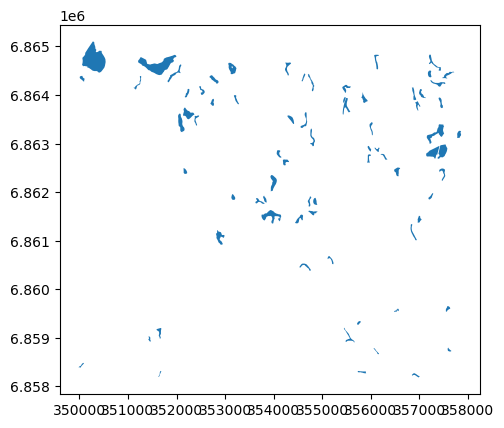

In [9]:
soistumat.plot()

<Axes: >

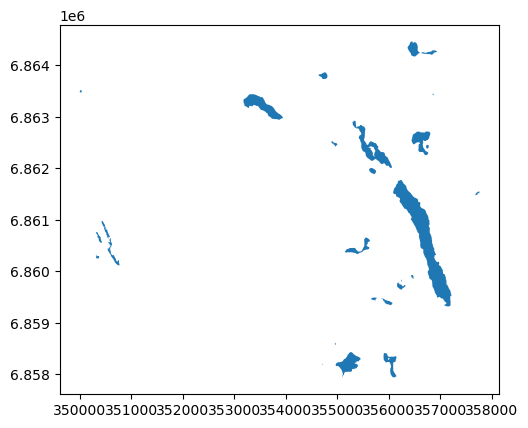

In [45]:
vave.plot()

<Axes: >

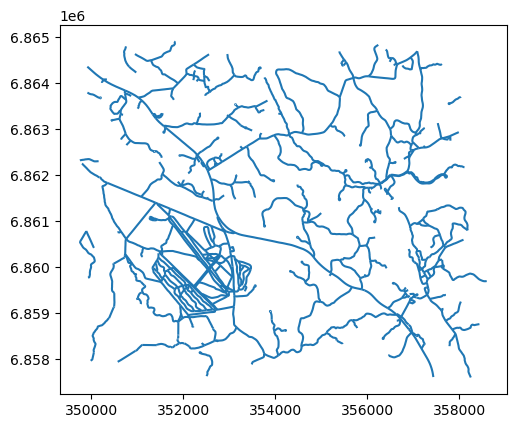

In [48]:
tiet.plot()

In [12]:
rst_fn = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/dem/kuivajarvi/cmask_d8_kuivajarvi_fill.asc'
out_fn = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/streams.asc'

In [13]:
rst = rasterio.open(rst_fn)
meta = rst.meta.copy()
meta.update(compress='lzw')

In [18]:
list(rst.bounds[:])

[350016.0, 6858072.0, 357856.0, 6864536.0]

In [1]:
with rasterio.open(out_fn, 'w+', **meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(vive.geometry, vive.kohdeluokka))

    burned = features.rasterize(shapes=shapes, fill=-9999, out=out_arr, transform=out.transform)
    burned[burned == 0] = -9999
    out.write_band(1, burned)

NameError: name 'rasterio' is not defined

In [78]:
burned

array([[-9999., 36311., -9999., ..., 36311., -9999., 36311.],
       [-9999., 36311., -9999., ..., -9999., -9999., -9999.],
       [-9999., 36311., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., 36311., -9999., -9999.],
       [-9999., -9999., -9999., ..., 36311., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., 36311., -9999.]],
      dtype=float32)

In [24]:
from tools import read_AsciiGrid

file = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/maastotietokanta/jarvi.asc'
test = read_AsciiGrid(file)
#plt.imshow(test[0])

In [25]:
test

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 ['ncols        490\n',
  'nrows        404\n',
  'xllcorner    350016.000000000000\n',
  'yllcorner    6858072.000000000000\n',
  'cellsize     16.000000000000\n',
  'NODATA_value  -9999\n'],
 (350016.0, 6858072.0),
 16.0,
 nan)